### Mine top 10 association rules worth recommending for [Groceries dataset](https://www.kaggle.com/heeraldedhia/groceries-dataset)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [12]:
len(df)

38765

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

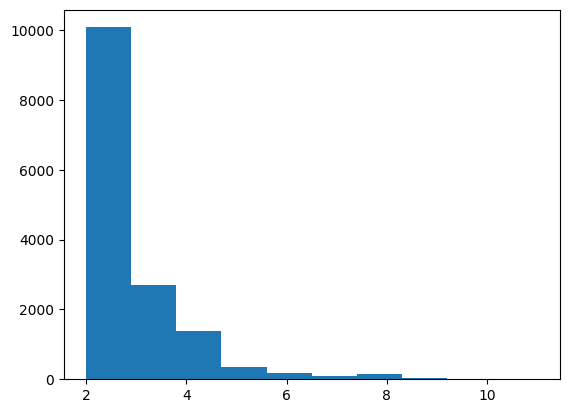

In [13]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [24]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

min_support = 0.001
min_confidence = 0.1 
rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)

top_10_rules = list(rules)[:10]
for i, rule in enumerate(top_10_rules, 1):
    items = ', '.join(rule.items)
    base_items = ', '.join(rule.ordered_statistics[0].items_base)
    support = rule.support
    confidence = rule.ordered_statistics[0].confidence

    print(f"Rule {i}:")
    print(f"  Items: {items}")
    print(f"  Base Items: {base_items}")
    print(f"  Support: {support:.5f}")
    print(f"  Confidence: {confidence:.5f}")

Rule 1:
  Items: other vegetables
  Base Items: 
  Support: 0.12210
  Confidence: 0.12210
Rule 2:
  Items: rolls/buns
  Base Items: 
  Support: 0.11000
  Confidence: 0.11000
Rule 3:
  Items: whole milk
  Base Items: 
  Support: 0.15792
  Confidence: 0.15792
Rule 4:
  Items: UHT-milk, other vegetables
  Base Items: UHT-milk
  Support: 0.00214
  Confidence: 0.10000
Rule 5:
  Items: whole milk, UHT-milk
  Base Items: UHT-milk
  Support: 0.00254
  Confidence: 0.11875
Rule 6:
  Items: beef, whole milk
  Base Items: beef
  Support: 0.00468
  Confidence: 0.13780
Rule 7:
  Items: berries, other vegetables
  Base Items: berries
  Support: 0.00267
  Confidence: 0.12270
Rule 8:
  Items: berries, whole milk
  Base Items: berries
  Support: 0.00227
  Confidence: 0.10429
Rule 9:
  Items: beverages, other vegetables
  Base Items: beverages
  Support: 0.00174
  Confidence: 0.10484
Rule 10:
  Items: beverages, soda
  Base Items: beverages
  Support: 0.00187
  Confidence: 0.11290
